In [29]:
# Imports needed in every section
import pandas as pd
#import testing_scripts.constants as constants
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix

#Read Data
folder_name = "../sample_input_data/supplementary_materials_output_data/"

#df_general_linkedin = pd.read_csv(folder_name+"GeneralLinkedinJobDescriptionScores.csv")
original_df = pd.read_csv(folder_name+"Original_CV.csv")
doordash_df = pd.read_csv(folder_name+"doordash_job_description.csv")
scalable_df = pd.read_csv(folder_name+"scalable_job_description.csv")
df = pd.read_csv("../data/scalable_two.csv")
#pd.read_csv("final_paper_classification_outputs_doordash.csv")


In [20]:
scalable_df.head()

,Unnamed: 0,Deepseek 67B Conversation-Improved CV Scalable PM Score,GPT-35 Conversation-Improved CV Scalable PM Score,GPT-4o Conversation-Improved CV Scalable PM Score,Mixtral-8x7B-Instruct-v0.1 Conversation-Improved CV Scalable PM Score,Meta-Llama-3-70B-Instruct-Turbo Conversation-Improved CV Scalable PM Score,claude-3-5-sonnet Conversation-Improved CV Scalable PM Score,True Label
0,0,78.973,78.100,80.888,78.319,80.036,80.873,0
1,1,78.973,79.949,78.971,79.563,78.221,79.425,0
2,2,78.267,77.308,81.317,80.517,79.216,80.481,0
3,3,80.714,77.437,81.587,80.924,81.130,80.928,0
4,4,79.001,79.667,77.755,77.857,77.651,77.410,0


## Motivating Figures (Section 3)

### Figure 1-A (Resume Scores Across Sequential LLM Manipulations)

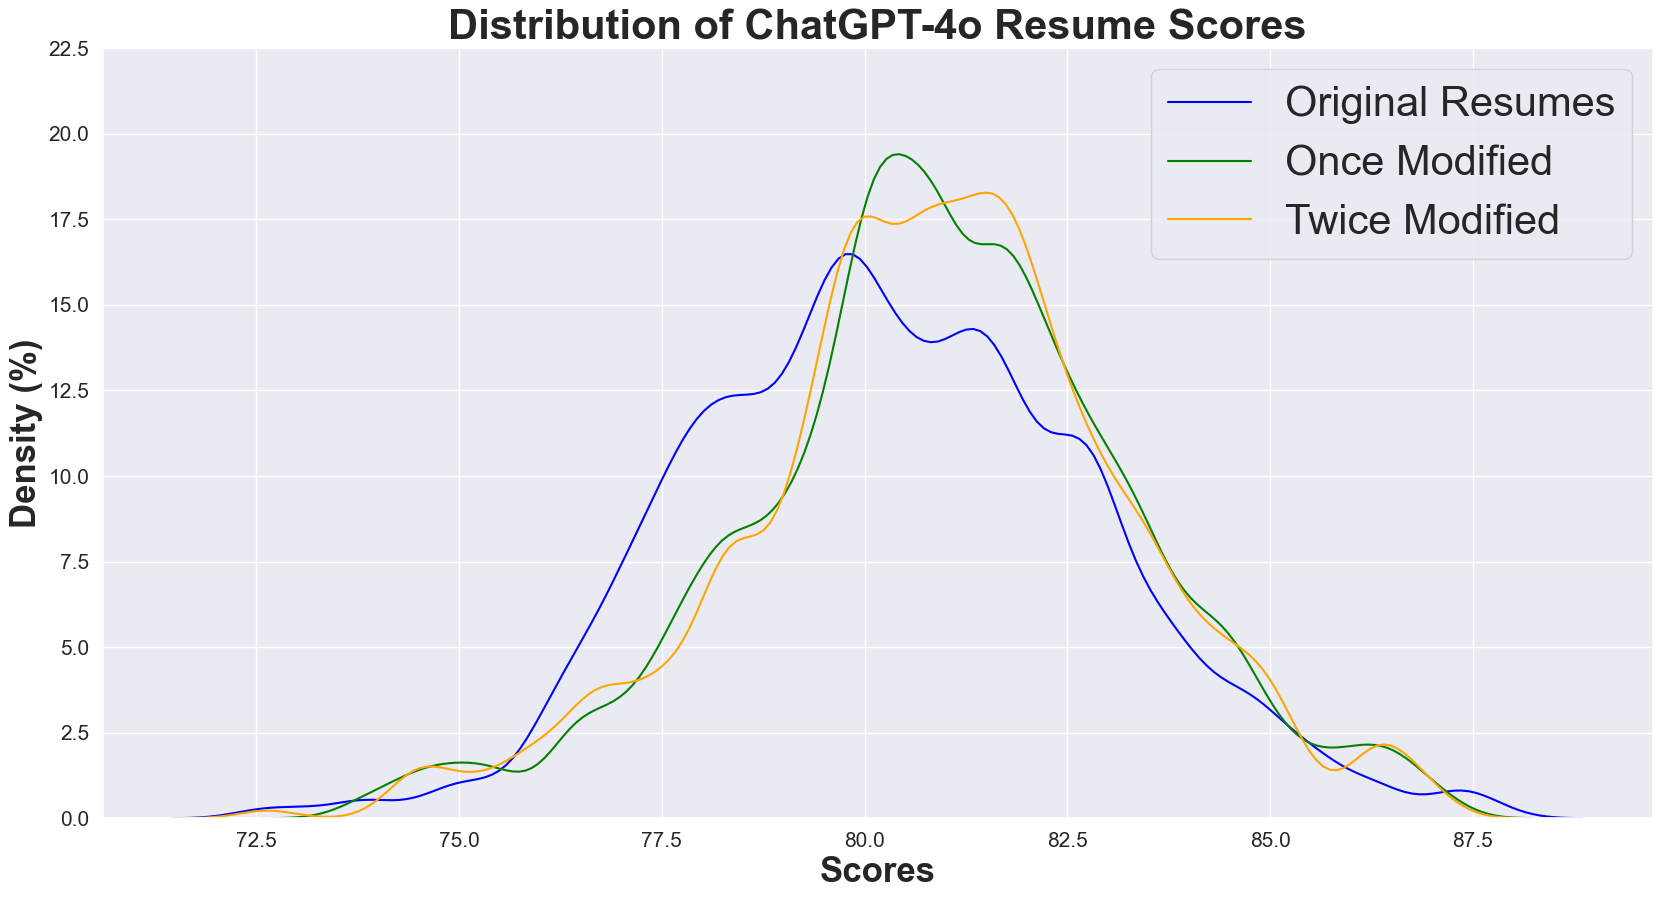

In [21]:
sns.set_theme(rc={'figure.figsize':(20,10)})
first_three_colors = ['blue', 'green', 'orange']

fig = sns.kdeplot(df['CVScalable PM Score'], bw_adjust=0.5, color=first_three_colors[0])  # bw_adjust adjusts the smoothness
fig = sns.kdeplot(df['Cleaned GPT-4o Conversation-Improved CVScalable PM Score'], bw_adjust=0.5, color=first_three_colors[1])
#sns.kdeplot(df['CVDoorDash PM Score'], bw_adjust=0.5)  # bw_adjust adjusts the smoothness
fig = sns.kdeplot(df['Cleaned Twice GPT-4o Conversation-Improved CVScalable PM Score'], bw_adjust=0.5, color=first_three_colors[2])
plt.title('Distribution of ChatGPT-4o Resume Scores', fontsize=30, fontweight="bold")
plt.yticks(fig.get_yticks(), np.round(fig.get_yticks() * 100, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Scores', fontsize=25, fontweight="bold")
plt.ylabel('Density (%)', fontsize=25, fontweight="bold")
plt.legend(['Original Resumes', 'Once Modified', 'Twice Modified'], fontsize=30)
#plt.grid()
plt.savefig('chatgpt1.png')
plt.show()

### Figure 1-B (Resume Scores over Different LLM Manipulations)

NameError: name 'doordash_df' is not defined

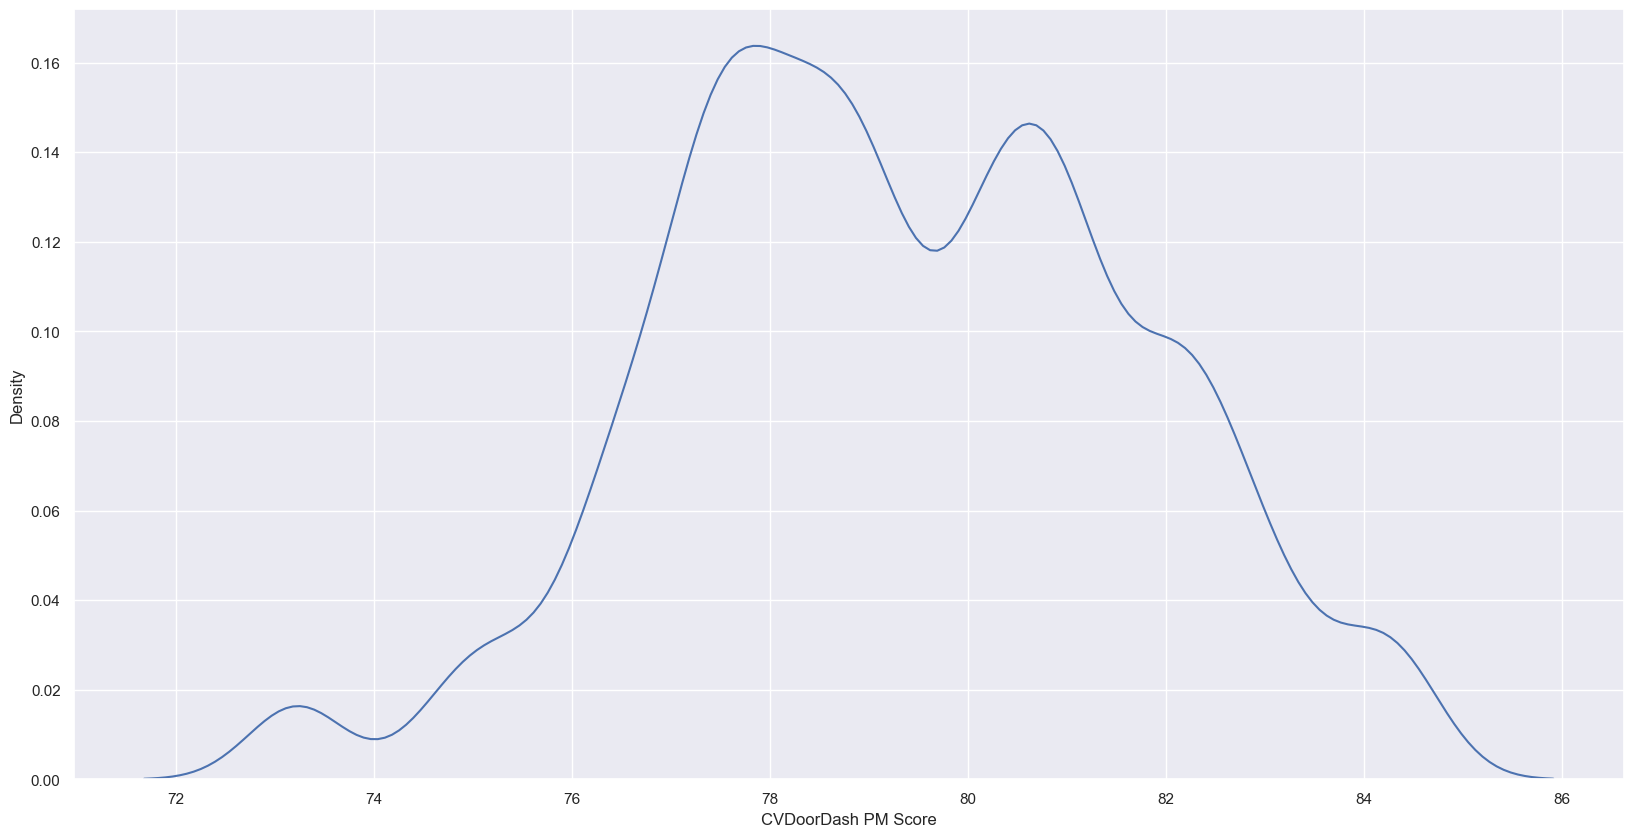

In [28]:
sns.set_theme(rc={'figure.figsize':(20,10)})
sns.kdeplot(original_df['CVDoorDash PM Score'], bw_adjust=0.5) 

keys = []
for col in doordash_df.columns:
    if 'Score' in col:
        sns.kdeplot(doordash_df[col], bw_adjust=0.5)
plt.title('Distribution of LLM-Modified Resume Scores for Doordash Job Description', fontsize=30,fontweight="bold")
plt.xlabel('Scores', fontsize=25, fontweight="bold")
#plt.yticks(fig.get_yticks(), np.round(fig.get_yticks() * 100, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Density (%)', fontsize=25, fontweight="bold")
plt.legend(['Original Resumes']+list([c for c in list(scalable_df.columns) if 'Score' in c]), fontsize=20)# fontweight="bold")
#plt.grid()
plt.savefig("differentllms1.png")
plt.show()

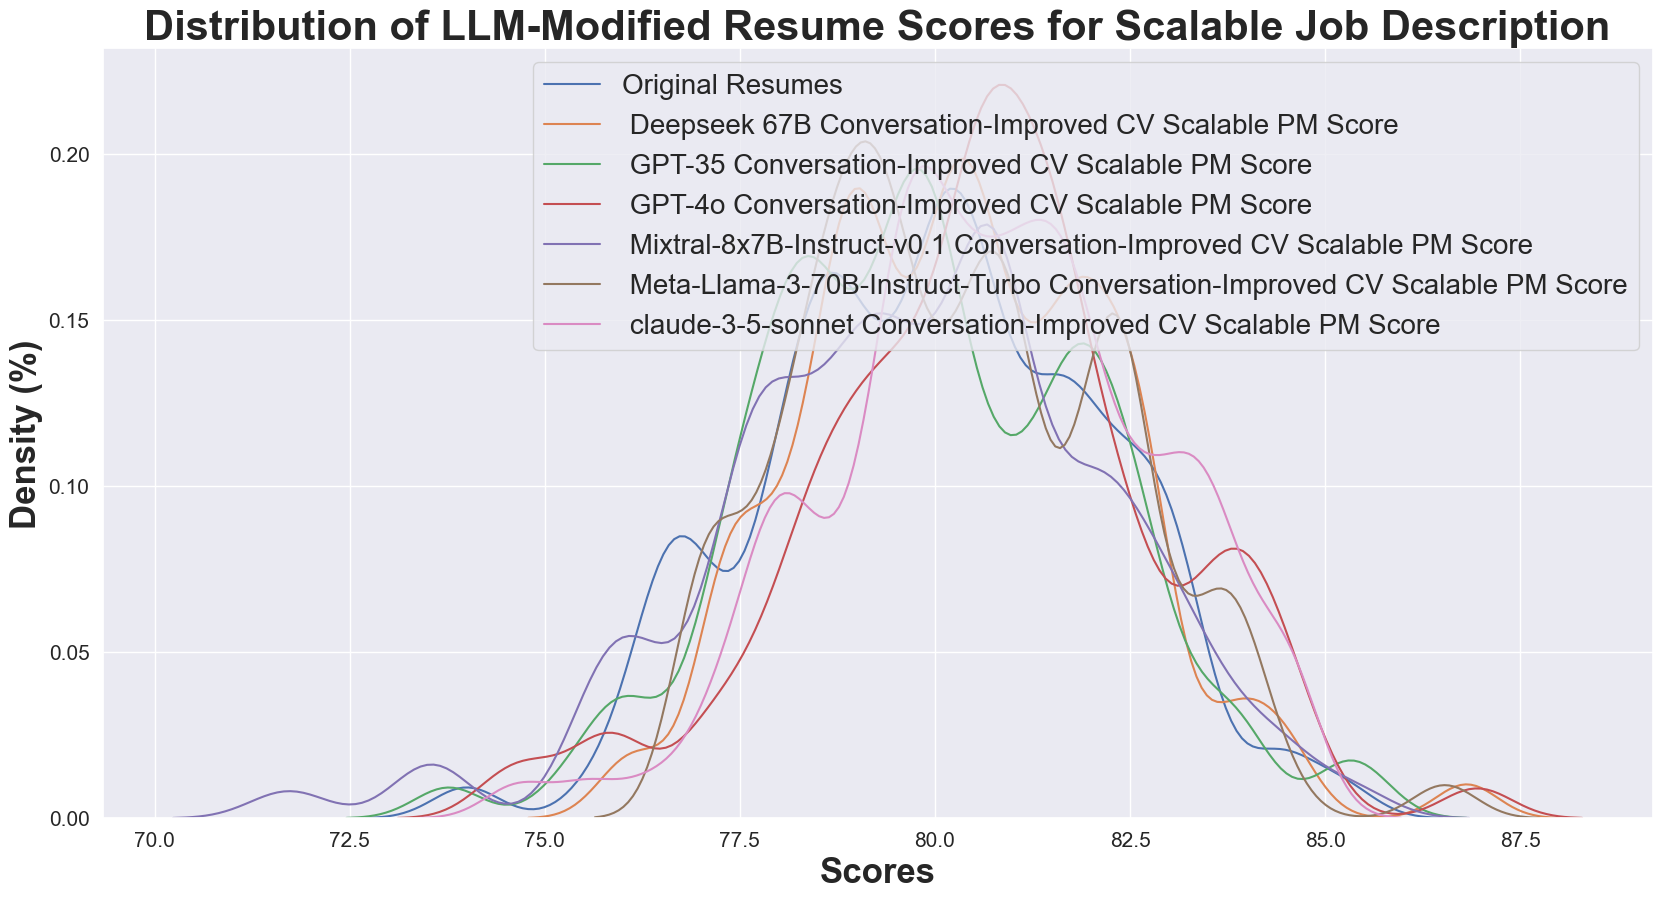

In [27]:
sns.set_theme(rc={'figure.figsize':(20,10)})
sns.kdeplot(original_df['CVScalable PM Score'], bw_adjust=0.5) 

keys = []
for col in scalable_df.columns:
    if 'Score' in col:
        sns.kdeplot(scalable_df[col], bw_adjust=0.5)
plt.title('Distribution of LLM-Modified Resume Scores for Scalable Job Description', fontsize=30,fontweight="bold")
plt.xlabel('Scores', fontsize=25, fontweight="bold")
#plt.yticks(fig.get_yticks(), np.round(fig.get_yticks() * 100, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Density (%)', fontsize=25, fontweight="bold")
plt.legend(['Original Resumes']+list([c for c in list(scalable_df.columns) if 'Score' in c]), fontsize=20)# fontweight="bold")
#plt.grid()
plt.savefig("differentllms1.png")
plt.show()

### Tables of Distribution of Modified Scores

In [133]:
print(f"Job Description #1 - General")
column_desc = df_general_linkedin['CVGeneral PM Score'].describe().loc[['mean', '25%', '75%']]
print("Overall (mean, 25%, 75%):")
print(column_desc)
        
# Group by 'True Label' and describe the column statistics for each group
grouped_desc = df_general_linkedin.groupby('True Label')['CVGeneral PM Score'].describe()
        
# Select only the mean, 25%, and 75% statistics after grouping
selected_group_stats = grouped_desc[['mean', '25%', '75%']]
        
print(f"Grouped by 'True Label' statistics (mean, 25%, 75%):")
print(selected_group_stats)
print("\n" + "="*50 + "\n")  # Separate outputs for each key

for key in df_model_scalable:
    print(key)
    column_name = 'Cleaned ' + key + ' CVGeneral PM Score'
        
    # Print the key (useful to know which DataFrame is being processed)
    print(f"Model: {key}")
        
    # Describe the column for the current DataFrame
    column_desc = df_general_linkedin[column_name].describe().loc[['mean', '25%', '75%']]
    print("Overall (mean, 25%, 75%):")
    print(column_desc)
        
    # Group by 'True Label' and describe the column statistics for each group
    grouped_desc = df_general_linkedin.groupby('True Label')[column_name].describe()
        
    # Select only the mean, 25%, and 75% statistics after grouping
    selected_group_stats = grouped_desc[['mean', '25%', '75%']]
        
    print(f"Grouped by 'True Label' statistics (mean, 25%, 75%):")
    print(selected_group_stats)



Job Description #1 - General
Overall (mean, 25%, 75%):
mean    80.16467
25%     78.57700
75%     81.83700
Name: CVGeneral PM Score, dtype: float64
Grouped by 'True Label' statistics (mean, 25%, 75%):
                 mean      25%      75%
True Label                             
0           79.740078  78.4075  80.9745
1           80.606592  79.4400  82.6650


Deepseek 67B Conversation-Improved
Model: Deepseek 67B Conversation-Improved
Overall (mean, 25%, 75%):
mean    81.860091
25%     79.103000
75%     84.542500
Name: Cleaned Deepseek 67B Conversation-Improved CVGeneral PM Score, dtype: float64
Grouped by 'True Label' statistics (mean, 25%, 75%):
                 mean       25%       75%
True Label                               
0           81.966471  79.38350  84.65550
1           81.747062  78.71125  84.53975
GPT-35 Conversation-Improved
Model: GPT-35 Conversation-Improved
Overall (mean, 25%, 75%):
mean    81.004667
25%     78.520000
75%     83.364000
Name: Cleaned GPT-35 Conversati

In [131]:
# Assuming df_model_scalable is a dictionary of DataFrames
print(f"Job Description #2 - Scalable")
column_desc = original_df['CVScalable PM Score'].describe().loc[['mean', '25%', '75%']]
print("Overall (mean, 25%, 75%):")
print(column_desc)
        
# Group by 'True Label' and describe the column statistics for each group
grouped_desc = original_df.groupby('True Label')['CVScalable PM Score'].describe()
        
# Select only the mean, 25%, and 75% statistics after grouping
selected_group_stats = grouped_desc[['mean', '25%', '75%']]
        
print(f"Grouped by 'True Label' statistics (mean, 25%, 75%):")
print(selected_group_stats)
print("\n" + "="*50 + "\n")  # Separate outputs for each key
for key in df_model_scalable:
    # Construct the column name dynamically
    column_name = 'Cleaned ' + key + ' CVScalable PM Score'
    
    # Print the key (useful to know which DataFrame is being processed)
    print(f"Model: {key}")
    
    # Describe the column for the current DataFrame
    column_desc = df_model_scalable[key][column_name].describe().loc[['mean', '25%', '75%']]
    print("Overall (mean, 25%, 75%):")
    print(column_desc)
    
    # Group by 'True Label' and describe the column statistics for each group
    grouped_desc = df_model_scalable[key].groupby('True Label')[column_name].describe()
    
    # Select only the mean, 25%, and 75% statistics after grouping
    selected_group_stats = grouped_desc[['mean', '25%', '75%']]
    
    print(f"Grouped by 'True Label' statistics (mean, 25%, 75%):")
    print(selected_group_stats)
    print("\n" + "="*50 + "\n")  # Separate outputs for each key


Job Description #2 - Scalable
Overall (mean, 25%, 75%):
mean    79.98106
25%     78.53650
75%     81.53350
Name: CVScalable PM Score, dtype: float64
Grouped by 'True Label' statistics (mean, 25%, 75%):
                 mean     25%     75%
True Label                           
0           79.459686  78.348  80.586
1           80.523714  79.109  82.224


Model: Deepseek 67B Conversation-Improved
Overall (mean, 25%, 75%):
mean    80.358758
25%     78.923500
75%     81.752000
Name: Cleaned Deepseek 67B Conversation-Improved CVScalable PM Score, dtype: float64
Grouped by 'True Label' statistics (mean, 25%, 75%):
                 mean     25%       75%
True Label                             
0           79.684340  78.716  80.53025
1           81.046939  79.581  82.46200


Model: GPT-35 Conversation-Improved
Overall (mean, 25%, 75%):
mean    79.903121
25%     78.449500
75%     81.610500
Name: Cleaned GPT-35 Conversation-Improved CVScalable PM Score, dtype: float64
Grouped by 'True Label' sta

## Outcome Metrics

In [31]:
print("Average ChatGPT-4o Improvements on Original, Unmodified Resumes (1 Iteration) & 96% Confidence Interval")
print(str(np.mean(df['Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score'] - df['CVDoorDash PM Score'])) + " +/ "+ str(1.96*np.std(df['Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score'] - df['CVDoorDash PM Score'])/22.2))

Average ChatGPT-4o Improvements on Original, Unmodified Resumes (1 Iteration) & 96% Confidence Interval
1.1881384615384614 +/ 0.13791601426489786


## Experimental Results with Binary Classification(See Section 8 of Paper)

In [46]:
'''
The following functions replicates how original resume scores are mapped to applicant reported 
and hirer inputted scores according to our traditional and two-ticket hiriing schemes, respectively.
'''

# Function that takes in choice amongst original & modified resume scores, and reports Applicant submitted scores. 
# These inputs are equivalent to the datapoints a traditional hiring system would consider.

job_name = 'DoorDash'
def map_input_score(row):
    if row['Will Manipulate']:
        #If applicant is manipulating, will report better performing score amongst original and modified resume.
        return max(row['CV'+job_name+' PM Score'], row['Cleaned GPT-4o Conversation-Improved CV'+job_name+' PM Score'])
    else:
        #If application is not manipulating, applicant can only report original score.
        return row['CV'+job_name+' PM Score']

# Function that takes in choice amongst original & modified resume scores, and reports Hirer inputted scores. Considers a modified version against the submitted resume.
def map_hirer_score(row):
    if row['Will Manipulate']:
        #If applicant has manipulated previously, take maximum of submitted score and 'twice' modified resume score.
        return max(row['input_score_'+job_name], row['Cleaned Twice GPT-4o Conversation-Improved CV'+job_name+' PM Score'])
    else:
        #If applicant has not manipulated previously, take maximum of submitted score and 'once' modified resume score.
        return max(row['input_score_'+job_name], row['Cleaned GPT-4o Conversation-Improved CV'+job_name+' PM Score'])

# Assuming your DataFrame is named 'df'
df['input_score_'+job_name] = df.apply(map_input_score, axis=1)
df['hirer_score_'+job_name] = df.apply(map_hirer_score, axis=1)
# Check statistics
df.groupby('True Label')[['input_score_'+job_name, 'hirer_score_'+job_name]].describe()

input_score_DoorDash                                         \
                          count       mean       std     min       25%   
True Label                                                               
0                         260.0  79.072608  2.039091  73.895  77.69050   
1                         260.0  81.293404  2.489718  73.121  79.72075   

                                     hirer_score_DoorDash             \
               50%       75%     max                count       mean   
True Label                                                             
0           79.072  80.48825  86.701                260.0  79.963765   
1           81.390  83.13275  86.998                260.0  82.122512   

                                                                  
                 std     min       25%      50%      75%     max  
True Label                                                        
0           1.836395  76.001  78.73025  79.9340  81.1080  86.701  
1           2.207033  73.121  80.73800  82.2345  83.6825  87.404

In [50]:
'''
The following functions replicates how original resume scores are mapped to applicant reported 
and hirer inputted scores according to our traditional and two-ticket hiriing schemes, respectively.
'''

# Function that takes in choice amongst original & modified resume scores, and reports Applicant submitted scores. 
# These inputs are equivalent to the datapoints a traditional hiring system would consider.

job_name = 'Scalable'
def map_input_score(row):
    if row['Will Manipulate']:
        #If applicant is manipulating, will report better performing score amongst original and modified resume.
        return max(row['CV'+job_name+' PM Score'], row['Cleaned GPT-4o Conversation-Improved CV'+job_name+' PM Score'])
    else:
        #If application is not manipulating, applicant can only report original score.
        return row['CV'+job_name+' PM Score']

# Function that takes in choice amongst original & modified resume scores, and reports Hirer inputted scores. Considers a modified version against the submitted resume.
def map_hirer_score(row):
    if row['Will Manipulate']:
        #If applicant has manipulated previously, take maximum of submitted score and 'twice' modified resume score.
        return max(row['input_score_'+job_name], row['Cleaned Twice GPT-4o Conversation-Improved CV'+job_name+' PM Score'])
    else:
        #If applicant has not manipulated previously, take maximum of submitted score and 'once' modified resume score.
        return max(row['input_score_'+job_name], row['Cleaned GPT-4o Conversation-Improved CV'+job_name+' PM Score'])

# Assuming your DataFrame is named 'df'
df['input_score_'+job_name] = df.apply(map_input_score, axis=1)
df['hirer_score_'+job_name] = df.apply(map_hirer_score, axis=1)
# Check statistics
df.groupby('True Label')[['input_score_'+job_name, 'hirer_score_'+job_name]].describe()

input_score_Scalable                                                \
                          count       mean       std     min     25%      50%   
True Label                                                                      
0                         260.0  79.612662  2.111239  72.553  78.171  79.6850   
1                         260.0  81.905200  2.367152  73.785  80.441  82.0385   

                           hirer_score_Scalable                               \
                75%    max                count       mean       std     min   
True Label                                                                     
0           80.8880  87.20                260.0  80.193885  1.905729  74.638   
1           83.4175  87.77                260.0  82.477081  2.163930  75.612   

                                               
                 25%      50%      75%    max  
True Label                                     
0           79.17800  80.2300  81.3300  87.20  
1           81.35525  82.5625  83.8945  87.77

In [40]:
'''
The following Functions help us calculate optimal thresholds according to our "No False Positives Objective" on the training sets.
in each iteration of our sampling test to generate an estimate for the our TPR and disparity improvements across Traditional and "Two-Ticket" Hiring.
'''

#Function that calculates the threshold according to an approximation our 'no-False Positives" objective.
#In other words, we want to find a threshold that maximizes the TPR but sets the FPR arbitrarily small (not zero, but sufficiently close).
def set_threshold_min_fpr(scores, labels, min_tpr=0.01):
    # Ensure scores and labels are numpy arrays
    scores = np.array(scores)
    labels = np.array(labels)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)

    # Find the index where TPR is just above min_tpr
    valid_idx = np.where(tpr >= min_tpr)[0]
    if len(valid_idx) > 0:
        best_idx = valid_idx[0]
        return thresholds[best_idx], fpr[best_idx], tpr[best_idx]
    else:
        # If no threshold gives TPR >= min_tpr, return the threshold with highest TPR
        best_idx = np.argmax(tpr)
        return thresholds[best_idx], fpr[best_idx], tpr[best_idx]

#Function that calculates the threshold according to an approximation our 'no-False Positives" objective.
#In other words, we want to find a threshold that maximizes the TPR but sets the FPR to zero.
def set_threshold_zero_fpr(scores, labels):
    # Ensure scores and labels are numpy arrays
    scores = np.array(scores)
    labels = np.array(labels)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    #print(fpr, tpr, thresholds)
    # Find the index of the first non-zero false positive rate
    zero_fpr_index = np.argwhere(fpr > 0)[0][0] - 1

    # Get the threshold that gives zero false positive rate
    threshold = thresholds[zero_fpr_index]

    return threshold

In [41]:
""" The following functions help us calculate our neccesary metrics on the testing set: namely, the disparity, TPR, FNR, & Accuracy."""
def calculate_disparity(y_true, y_pred, y_manipulate_label):

    y_true_a = [y_true[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==True]
    y_pred_a = [y_pred[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==True]

    y_true_b = [y_true[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==False]
    y_pred_b = [y_pred[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==False]
    #print(np.mean(y_true_a), np.mean(y_true_b))
    #print(len(y_true_a), len(y_true_b))
    tn_a, fp_a, fn_a, tp_a = confusion_matrix(y_true_a, y_pred_a).ravel()
    tn_b, fp_b, fn_b, tp_b = confusion_matrix(y_true_b, y_pred_b).ravel()

    tpr_a = tp_a/(tp_a + fn_a)
    tpr_b = tp_b/(tp_b + fn_b)
    return tpr_a - tpr_b

def calculate_tpr_fnr_accuracy(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    return tpr, fnr, accuracy

In [42]:
job_name

'Scalable'

In [51]:
num_iter = 500
results = []

#Repeat our experiment num_iter times: each experiment has resamples a new train-test split.
for i in range(num_iter):

  #Conduct the train-test split.
  train_df = df.sample(frac=0.7, random_state=i)
  test_df = df.drop(train_df.index)

  ## Calculate Traditional-Threshold with One Ticket
  threshold, train_fpr, train_tpr = set_threshold_min_fpr(train_df['input_score_'+job_name], train_df['True Label'])

  #Get Predictions of Traditional Classifier on Test Set from Above Threshold. 
  test_predictions_1ticket = [1 if score >= threshold else 0 for score in test_df['input_score_'+job_name]]
  test_labels = test_df['True Label'].values
  test_manipulate_label = test_df['Will Manipulate'].values

  #Get Predictions of Two Ticket Classifier on Test Set from Above Threshold. 
  test_predictions_2ticket = [1 if score >= threshold else 0 for score in test_df['hirer_score_'+job_name]]
  test_labels = test_df['True Label'].values

  # Calculate Metrics of Traditional Classifier on Test Set.
  test_tpr_1ticket, test_fnr_1ticket, test_accuracy_1ticket = calculate_tpr_fnr_accuracy(test_labels, test_predictions_1ticket)
  test_disparity_1_ticket = calculate_disparity(test_labels, test_predictions_1ticket, test_manipulate_label)
  #print(f"True Positive Rate on 1 ticket test set: {test_tpr_1ticket:.2f}")

  # Calculate Metrics of Two Ticket Classifier on Test Set.
  test_tpr_2ticket, test_fnr_2ticket, test_accuracy_2ticket = calculate_tpr_fnr_accuracy(test_labels, test_predictions_2ticket)
  test_disparity_2_ticket = calculate_disparity(test_labels, test_predictions_2ticket, test_manipulate_label)

  #Append Metrics of classifiers, per iteration to our final collected data.
  results.append({
    'test_accuracy_1ticket': test_accuracy_1ticket,
    'test_accuracy_2ticket': test_accuracy_2ticket,
    #Get the pairwise difference in accuracy between the two ticket and traditional classifier for each iteration (results in our paper's table).
    'test_accuracy_improvement': test_accuracy_2ticket-test_accuracy_1ticket,

    'test_tpr_1ticket': test_tpr_1ticket,
    'test_tpr_2ticket': test_tpr_2ticket,
    #Get the pairwise difference in TPR between the two ticket and traditional classifier for each iteration (results in our paper's table).
    'tpr_improvement':  test_tpr_2ticket-test_tpr_1ticket,

    'test_disparity_1ticket': test_disparity_1_ticket,
    'test_disparity_2_ticket': test_disparity_2_ticket,
    #Get the pairwise difference in disparity between the two ticket and traditional classifier for each iteration (results in our paper's table).
    'disparity_decrease_2_1':  test_disparity_1_ticket-test_disparity_2_ticket,
                 
    'Threshold': threshold,
    'train_fpr': train_fpr,
    'train_tpr': train_tpr,
                  
    'test_fnr_1ticket': test_fnr_1ticket,
    'test_fnr_2ticket': test_fnr_2ticket,
    'num_accepted_1ticket': sum(test_predictions_1ticket),
    'num_accepted_2ticket': sum(test_predictions_2ticket),
    'tpr_improvement_b': True if test_tpr_2ticket - test_tpr_1ticket > 0 else False,
                  
  })

In [52]:
job_name

'Scalable'

In [53]:
results_df = pd.DataFrame(results)
results_df.describe()

,test_accuracy_1ticket,test_accuracy_2ticket,test_accuracy_improvement,test_tpr_1ticket,test_tpr_2ticket,tpr_improvement,test_disparity_1ticket,test_disparity_2_ticket,disparity_decrease_2_1,Threshold,train_fpr,train_tpr,test_fnr_1ticket,test_fnr_2ticket,num_accepted_1ticket,num_accepted_2ticket
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.510462,0.512218,0.001756,0.021246,0.024784,0.003539,0.030101,0.025986,0.004115,86.926084,0.000428,0.023145,0.978754,0.975216,1.932000,2.206000
std,0.035029,0.036226,0.004658,0.027277,0.034417,0.009404,0.030058,0.029399,0.017347,0.653615,0.001472,0.018066,0.027277,0.034417,2.518743,3.080022
min,0.358974,0.358974,0.000000,0.000000,0.000000,0.000000,-0.057041,-0.131436,-0.031250,84.451000,0.000000,0.010204,0.815789,0.750000,0.000000,0.000000
25%,0.487179,0.487179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.788000,0.000000,0.015789,0.973333,0.972973,0.000000,0.000000
50%,0.512821,0.512821,0.000000,0.013072,0.013158,0.000000,0.025641,0.025000,0.000000,87.255000,0.000000,0.016667,0.986928,0.986842,1.000000,1.000000
75%,0.532051,0.538462,0.000000,0.026667,0.027027,0.000000,0.048780,0.045455,0.000000,87.255000,0.000000,0.022346,1.000000,1.000000,2.000000,2.000000
max,0.602564,0.621795,0.032051,0.184211,0.250000,0.065789,0.155093,0.143411,0.138889,87.414000,0.005780,0.153005,1.000000,1.000000,17.000000,21.000000
